## ICP07 Neural Networks
## Rodgers Okeyo Ochieng

Description: Using the digit classifier notebook demonstrated in class, add another modeling technique of your choice (SGDClassifier or Logistic Regression). Discuss how well this performed versus the neural network.

## Load libraries

In [4]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import collections


from sklearn import datasets


np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [5]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [7]:
print(len(mnist.data))

1797


Let's look at the frequency of each digit in the data set. This will allow us to see if the data set is balanced or not.

In [8]:
import collections

counts = collections.Counter(mnist.target)
counts

Counter({3: 183,
         1: 182,
         5: 182,
         4: 181,
         6: 181,
         9: 180,
         7: 179,
         0: 178,
         2: 177,
         8: 174})

We can look at the count of each digit using a histogram as well...

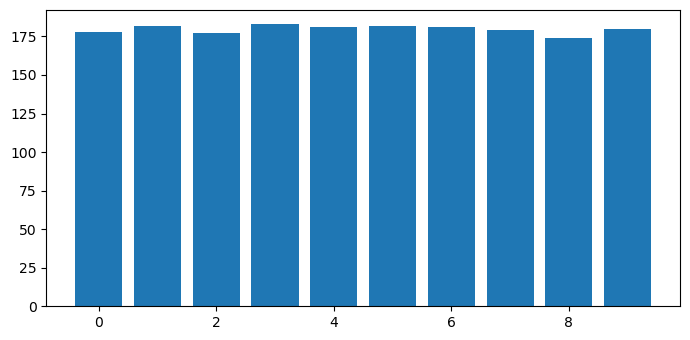

In [9]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(counts.keys(), counts.values())

# Display the plot
plt.show()

Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [10]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [11]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

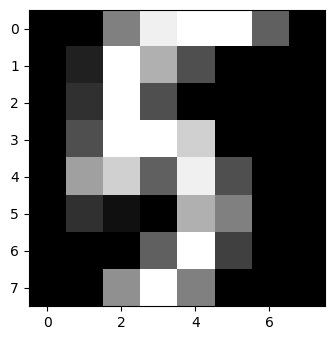

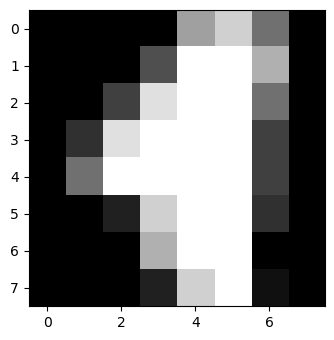

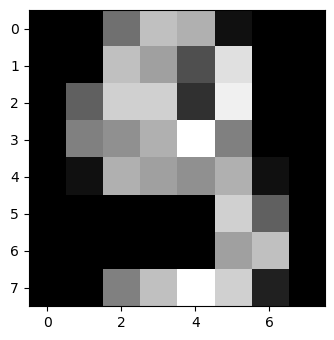

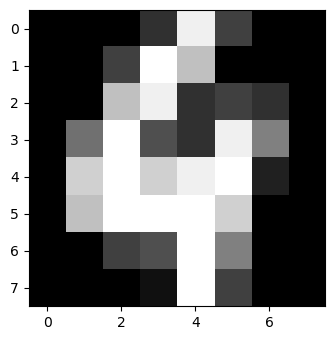

In [13]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


Now that we understand data splitting, we can now use this in our model building process.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

## Normalize/Standardize the data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

### Neural Net

In [14]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(128,64,32), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

CPU times: total: 1.11 s
Wall time: 519 ms


In [15]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 0 ns
Wall time: 911 µs


Sinc this is a multi-class target (0 through 9), our confusion matrix is a 10x10 matrix.

In [16]:
confusion_matrix(y_test, y_pred)

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]], dtype=int64)

For example, if we had a 3-class problem with the following actual and predicted values

In [17]:
actual =    [0,0,1,1,0,2,2,2,0,1]
predicted = [0,1,1,0,0,2,1,2,2,1]

The confusion matrix for this would be:

In [18]:
c_matrix = confusion_matrix(actual, predicted)
c_matrix

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

In [19]:
accuracy = np.sum(np.diag(c_matrix)) / np.sum(c_matrix)
accuracy

0.6

In [20]:
accuracy_score(actual, predicted)

0.6

In [21]:
c_matrix

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

In [22]:
confusion_matrix(actual, predicted)

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

In [23]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.50      0.67      0.57         3
           2       0.67      0.67      0.67         3

    accuracy                           0.60        10
   macro avg       0.61      0.61      0.60        10
weighted avg       0.62      0.60      0.60        10



In [24]:
recall_score(actual, predicted, average='micro')

0.6

In [25]:
recall_score(actual, predicted, average='macro')

0.611111111111111

In [26]:
recall_score(actual, predicted, average='weighted')

0.6

In [27]:
c_matrix

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

In [28]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.50      0.67      0.57         3
           2       0.67      0.67      0.67         3

    accuracy                           0.60        10
   macro avg       0.61      0.61      0.60        10
weighted avg       0.62      0.60      0.60        10



In [29]:
precision_score(actual, predicted, average='micro')

0.6

In [30]:
precision_score(actual, predicted, average='macro')

0.611111111111111

In [31]:
precision_score(actual, predicted, average='weighted')

0.6166666666666666

**F1-SCORE**
  * Manual Calculation: I'll leave this for an exercise for you to try 

In [32]:
f1_score(actual, predicted, average='micro')

0.6

In [33]:
f1_score(actual, predicted, average='macro')

0.6031746031746033

In [34]:
f1_score(actual, predicted, average='weighted')

0.6

In [35]:
accuracy = ann.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")


f1_micro = f1_score(y_test, y_pred, average='micro')
print(f"{'F1 Micro:':20s}{f1_micro:.4f}")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"{'F1 Macro:':20s}{f1_macro:.4f}")

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"{'F1 Weighted:':20s}{f1_weighted:.4f}")


recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"{'Recall Micro:':20s}{recall_micro:.4f}")

recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"{'Recall Macro:':20s}{recall_macro:.4f}")

recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f"{'Recall Weighted:':20s}{recall_macro:.4f}")


precision_micro = precision_score(y_test, y_pred, average='micro')
print(f"{'Precision Micro:':20s}{precision_micro:.4f}")

precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{'Precision Macro:':20s}{precision_macro:.4f}")

precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{'Precision Weighted:':20s}{precision_macro:.4f}")


Accuracy:           0.9806
F1 Micro:           0.9806
F1 Macro:           0.9795
F1 Weighted:        0.9806
Recall Micro:       0.9806
Recall Macro:       0.9790
Recall Weighted:    0.9790
Precision Micro:    0.9806
Precision Macro:    0.9806
Precision Weighted: 0.9806


But, we often are most concerned with the values displayed in the classification report summary table.

In [36]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     0.9722    1.0000    0.9859        35
           2     1.0000    0.9722    0.9859        36
           3     0.9535    1.0000    0.9762        41
           4     0.9744    1.0000    0.9870        38
           5     0.9355    0.9667    0.9508        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     1.0000    0.9310    0.9643        29
           9     0.9706    0.9706    0.9706        34

    accuracy                         0.9806       360
   macro avg     0.9806    0.9790    0.9795       360
weighted avg     0.9811    0.9806    0.9806       360



It might help for you to visualize the performance of this model as follows:

[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


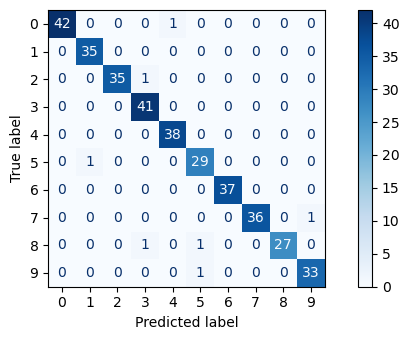

In [37]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## With Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = rf_classifier.predict(X_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[41,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]], dtype=int64)

In [20]:
 print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9762    0.9535    0.9647        43
           1     1.0000    1.0000    1.0000        35
           2     1.0000    1.0000    1.0000        36
           3     1.0000    0.9756    0.9877        41
           4     0.9500    1.0000    0.9744        38
           5     0.9677    1.0000    0.9836        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     1.0000    0.9655    0.9825        29
           9     0.9429    0.9706    0.9565        34

    accuracy                         0.9833       360
   macro avg     0.9837    0.9838    0.9836       360
weighted avg     0.9838    0.9833    0.9834       360



## Discussion on the performance of a Random Forest Classifier and the neural network model.

### Random Search CV

In [40]:
# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Define the parameter grid for randomized search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create a RandomizedSearchCV object
rand_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=1
)

# Fit the RandomizedSearchCV object to the training data
rand_search.fit(X_train, y_train)

# Get the best Random Forest classifier model
best_rf_classifier = rand_search.best_estimator_

# Print the best parameters found
print(rand_search.best_params_)


{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [41]:
y_pred = bestMLPClassifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        43
           1     0.9722    1.0000    0.9859        35
           2     1.0000    0.9722    0.9859        36
           3     1.0000    1.0000    1.0000        41
           4     1.0000    1.0000    1.0000        38
           5     0.9355    0.9667    0.9508        30
           6     1.0000    1.0000    1.0000        37
           7     0.9730    0.9730    0.9730        37
           8     1.0000    0.9310    0.9643        29
           9     0.9429    0.9706    0.9565        34

    accuracy                         0.9833       360
   macro avg     0.9824    0.9813    0.9816       360
weighted avg     0.9837    0.9833    0.9834       360



[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


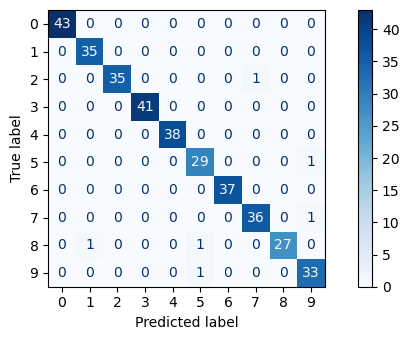

In [42]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Grid Search

In [44]:
# Define the parameter grid for grid search
score_measure = "accuracy"
kfolds = 4

best_params = rand_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

# Define the parameter grid for grid search
param_grid = {
   'n_estimators': [best_n_estimators],
    'max_depth': [best_max_depth],
    'min_samples_split': [best_min_samples_split],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=kfolds,
    scoring=score_measure,
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

bestMLPClassifier = grid_search.best_estimator_

print(grid_search.best_params_)



{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [45]:
y_pred = bestMLPClassifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9535    0.9762        43
           1     1.0000    1.0000    1.0000        35
           2     1.0000    1.0000    1.0000        36
           3     1.0000    0.9756    0.9877        41
           4     0.9500    1.0000    0.9744        38
           5     0.9677    1.0000    0.9836        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     0.9655    0.9655    0.9655        29
           9     0.9429    0.9706    0.9565        34

    accuracy                         0.9833       360
   macro avg     0.9826    0.9838    0.9830       360
weighted avg     0.9839    0.9833    0.9834       360



[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


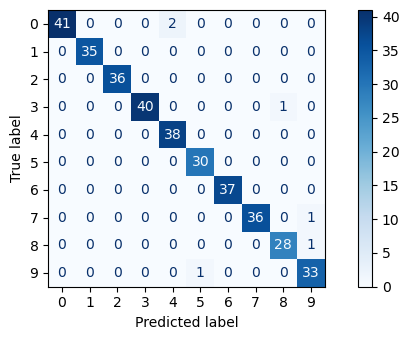

In [46]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Discussion

I fit a random forest classifier to the data and used it to do the prediction. Overall, the two models were very close to each other before introducing any hyperparameter tuning. Once I introduced a randomized hyperparameter tuning, there was no major change in the performance measures of precision accuracy and F1 score. The random forest model was performing better with an f1 score having a weighted average of 0.9834 while the original mlp classifier had an f1 score weighted average of 0.9808. No major chancge was noticed after doing a grid search from the random search.